# Honda Fit Econo Car Camper Project


### 5 passenger transportation  >  > 2 passenger mini camper

This notebook details my 2010 Honda Fit Sport trim, personal automobile and now housing unit. I plan to use this vehicle to explore the US. This notebook will include pictures of design and construction process, as well as visualizations of data related to the project. It is for fun, to learn about python and to create a portfolio piece.

#### Already created resources
[Google Sheet with Items/Layout](https://docs.google.com/spreadsheets/d/1AakB_KuwwG55wRmKisJuV0qMJfDBMC6Qhtn8vn6wCjw/edit?usp=sharing)

Optional areas to explore
- Cost of the Build
- Honda fit milage/repair cost
- Gear and the decision behind gear
- Post to a forum-Ask if I am forgetting anything, packing unneccessary things or if there are good ways to add on to the build.

#### Table of Contents
- Background
- Construction process
    - Research
        - Inspiration(Singletracksampler, honda fit youtube videos, random youtube vanlife content, rent cost)
        - KISS principle, then iterate (Reference cutting width)
    - Cardboard template
    - Tools needed
    - Wood used
    - Timeframe
- Current setup
    - String around oh shit handles
    - Caribeeners
    - Fridge
    - Recent additions
        - Bed and Bedding
        - cutout width for egress
        - Solar Panel
        - Battery




# Settings and ... Jimi 

In [4]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
#This tells Jupyter to print the results for any variable or statement on it’s own line.

#Brandon Rhodes CSS for df's
from IPython.core.display import HTML
css = open(r'C:\Users\andyk\Documents\Python\FitCamper\style-table.css').read() + open(r'C:\Users\andyk\Documents\Python\FitCamper\style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

from IPython.display import HTML
from IPython.display import Image
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/LyqC6_TgLOo" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

D:\Anaconda\lib\site-packages\IPython\core\display.py:694: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


## Background

Hi!
Welcome to my Jupyter Notebook. It is a web document that contains live code to read, dmanipulate, analyze, and visualize data, contains markup text to format bold, text size,add inline media and more. I am using the pandas package in python.

My name is Andrew. I am a recent college graduate. At 25 years old, I quit my  corporate job after 2 years to persue a different corporate job somewhere new. I live in Michigan in the suburbs of Detroit. I realized I wanted to explore more of the country after visiting a brother in Dallas and this project woul help achieve that goal.

While I was still employed, as a way to deal with the doldrum of working, I dreamt of packing up my stuff and hitting the road. I saved money and began sketching the outlines of the project.

As an unemployed person, I found myself with a dream and free time, and set to work. I have a background in working with software and computers, so working with my hands was a refreshingly novel challenge.

During my buildout, I recieved another job offer and will be extending my time in the corporate world....for now. However, this project will continue to be refined. I plan on using the Fit Camper as a weekend rig & basecamp to go on extended adventures.

# Cost of the build

### Total Cost ~1200
Some of the more expensive items include:
- Fridge 180
- Battery 250
- 60w Solar Setup 120

# Here are some quick excel pivots
#### Category	Costs
![Camper Costs](FitCamper\CamperCosts.jpg)


#### Breakdown of Costs
![Camper Costs](FitCamper\CamperCostsBreakdown.jpg)

# Now try it in python

In [10]:
import pandas as pd
import numpy as np
cost = pd.read_excel("FitCamper\Costs.xlsx",sheet_name = 0)
cost = pd.read_excel("FitCamper\Costs.xlsx",sheet_name = 0)
cost = cost.set_index('Item')

cost["Category"] = cost["Category"].astype("category")
#cost['Cost'] = pd.to_numeric(cost['Cost'])
cost['Cost'] = cost['Cost'].astype('float')
pd.options.display.float_format = '${:,.0f}'.format
#df["Status"].cat.set_categories(["Construction","pending","presented","declined"],inplace=True) #Not strictly necessary, but sets order
#pd.pivot_table(cost,index=["Category"],values=["Cost"],aggfunc=np.sum)
cost.groupby('Category').sum()

,Cost
Category,
Bedding,$170
Comforts,$81
Construction,$91
Kitchen,$349
Luxury,$370
Misc,$155


# Messing around with Pandas

### Checking the dimensions of the dataset

In [11]:
c = cost
size = c.size
shape = c.shape
# printing size and shape
#https://www.geeksforgeeks.org/python-pandas-df-size-df-shape-and-df-ndim/
print("Size = {}\nShape ={}\nShape[0] x Shape[1] = {}". 
format(size, shape, shape[0]*shape[1]))
      #The \n is a line break in the output
        #{} input a variable
print("The output is telling us the results of the size and shape functions")

Size = 99
Shape =(33, 3)
Shape[0] x Shape[1] = 99
The output is telling us the results of the size and shape functions


### Slicing a dataframe

In [12]:
#cost.iloc[0:shape[0],0:shape[1]-1]
#.iloc uses an index system to grab a slice of a df
#ie, the first item and the first row 
cost.iloc[0:1,0:1]
#or the first item and all rows
cost.iloc[0:1,0:shape[1]]

,Cost
Item,
Mattress,$105


,Cost,Category,Unnamed: 3
Item,,,
Mattress,$105,Bedding,NaN


### What are the top 10 most inexpensive items?

In [13]:
citems = cost.iloc[0:shape[0],0:2]
citems.sort_values('Cost').head(10)

,Cost,Category
Item,,
Wood 2x4,$2,Construction
Soap,$6,Kitchen
Carabiners,$7,Misc
Wood 48x16x3/4,$7,Construction
First Aid Kit,$7,Misc
Staples,$7,Construction
Cutting Board,$9,Kitchen
Spatula,$9,Kitchen
Jet boil stand,$10,Kitchen


### What about the most expensive items by category?

In [14]:
# I use the groupby function to give me the 2 largest items by cost for each of the categories and save it to the variable, l
h = citems.groupby('Category')['Cost'].nlargest(2).reset_index()

#The groupby function allows us to easily grab all the categories, and add them to a dictionary
dfs = dict(tuple(h.groupby('Category')))

#I use a for loop to go through the categories, the colon (:) and following lines indentation indicates you are using the loop
for df in dfs:
    print("Highest cost items in " + df)
    dfs[df].iloc[:,1:3] #Grab just the name of the item and cost

Highest cost items in Bedding


,Item,Cost
0,Mattress,$105
1,Mattress cover,$35


Highest cost items in Comforts


,Item,Cost
2,Reflectix,$24
3,Velcro,$23


Highest cost items in Construction


,Item,Cost
4,Pipe Supports,$25
5,Rug,$20


Highest cost items in Kitchen


,Item,Cost
6,Fridge,$179
7,Table,$37


Highest cost items in Luxury


,Item,Cost
8,Battery,$250
9,Solar,$120


Highest cost items in Misc


,Item,Cost
10,Jet boil ripoff,$47
11,Mini table,$45


### Lowest cost items by Category?

In [15]:
l = citems.groupby('Category')['Cost'].nsmallest(2).reset_index()

#The groupby function allows us to easily grab all the categories, and add them to a dictionary
dfs2 = dict(tuple(l.groupby('Category')))

#I use a for loop to go through the categories, the colon (:) and following lines indentation indicates you are using the loop
for df in dfs:
    print("Lowest cost items in " + df)
    dfs[df].iloc[:,1:3] #Grab just the name of the item and cost

Lowest cost items in Bedding


,Item,Cost
0,Mattress,$105
1,Mattress cover,$35


Lowest cost items in Comforts


,Item,Cost
2,Reflectix,$24
3,Velcro,$23


Lowest cost items in Construction


,Item,Cost
4,Pipe Supports,$25
5,Rug,$20


Lowest cost items in Kitchen


,Item,Cost
6,Fridge,$179
7,Table,$37


Lowest cost items in Luxury


,Item,Cost
8,Battery,$250
9,Solar,$120


Lowest cost items in Misc


,Item,Cost
10,Jet boil ripoff,$47
11,Mini table,$45


# Seaborn Distribution & Swarm Plots

In [16]:
import seaborn as sns
sns.set(style="whitegrid")
ax = sns.boxplot(x=cost["Cost"])

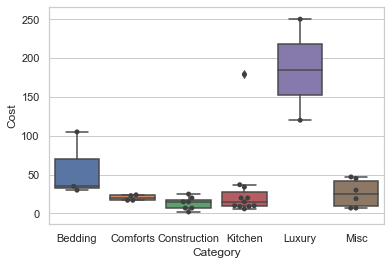

In [17]:
ax = sns.boxplot(x="Category", y="Cost", data=cost, width = .8)
ax = sns.swarmplot(x="Category", y="Cost", data=cost, color=".25")

[(2, 115)]

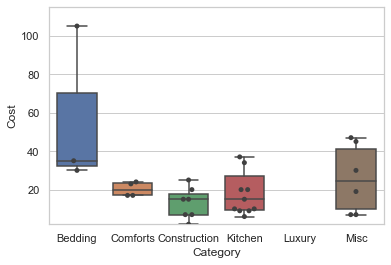

In [18]:
ax = sns.boxplot(x="Category", y="Cost", data=cost, width = .7)
ax = sns.swarmplot(x="Category", y="Cost", data=cost, color=".25")
ax.set(ylim=(2, 115))

[(115, 260)]

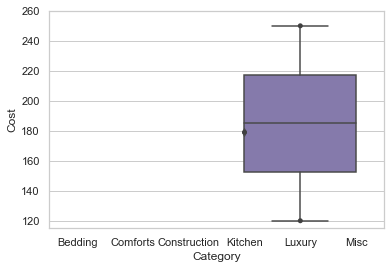

In [19]:
ax = sns.boxplot(x="Category", y="Cost", data=cost, width = 2)
ax = sns.swarmplot(x="Category", y="Cost", data=cost, color=".25")
ax.set(ylim=(115, 260))

# Construction Process
### Research
Research began as a foray into the van life part of youtube. It is an interesting and seemingly limitless void, as van life has increased in popularity as the price of housing staying high in many parts of the world.

I saw some videos I knew I did not want to emulate.

[Like this one](https://www.youtube.com/watch?v=OsW2AiVKcgw)
<div>
<img src="FitCamper\badexample.png" width="400"/>
</div>


##### However I found a bunch that were incredibly inspiring!
[Like this one](https://www.youtube.com/watch?v=Nr27swF2MBA)
<div>
<img src="FitCamper\coolvid.png" width="400"/>
</div>

##### Their design used a U design in the rear, and a central spine that connected to the front cross piece
![SegmentLocal](FitCamper\cooldesign.gif "inspiring design")


[Or this one](https://youtu.be/8F5LkJoeMLg)

[This one too!](https://www.youtube.com/watch?v=lA8sNcdKEBs)

[Ok One more...Meet Yohei](https://www.youtube.com/watch?v=KaLJFvyyMJo)

This is Yohei

<div>
<img src="FitCamper\yohei.png" width="400"/>
</div>


Yohei's kitchen inspired me to ball out way more on my cooking apperatus.
![SegmentLocal](FitCamper\yohei.gif "yohei")



### My Design

While watching these videos and doing various research on van living I began to formulate my plan for the Honda.
I knew I wanted to have a comfortable bed. That would not be an area of compromise. As such, I needed a large flat surface to sprawl on. A double bed was not going to do it.

I ended up following the first videos design closely, also using their cardboard prototyping step to ensure my design made sense. 

I chose to remove the rear seats to maximize cargo room. Support weight via a central spine notched to intersect the U that sits in the rear of the car.
#### Pic

I figured minimizing the structure woudld limit weight, and decided to use pipe/wood supports for the front left and right unsupported corners.
Here are the supports I put together
2x4's
##### Pic
Pipe Supports
##### Pic
I tried to use the KISS principle, iterating often. As an example, I cut the width of the sleeping platform down in the front.
##### Pics

This allows you to almost stand inside of the cabin, whereas before this was impossible which led to a claustrophobic environment. I believe I will be able to sit and use the front of the mattress platform as a desk.


The process involved a good amount of trial and error and iterative cutting. i.e. measure 20 times and cut 38


But I got it done.

## Insert Pictures Here

## Add a Mattress

I got a 4 inch memory foam topper to use as my mattress
it was $105 shipped.

After getting letting the mattress expand in the car, it became clear that I was going to have to cut a good chunk of foam for the mattress to fit correctly. I cut sections to accomodate the rear  wheel wells, and eventually cut the front left side.

